In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [69]:
# Open dataset and normalize data
df = pd.read_csv('joesley_day.csv', index_col=['Date'])
df = df.loc['2017-03-16':'2017-05-17', :]
#df_norm = df / df.iloc[0]
df_norm = np.log(df / df.shift(1)).dropna()
df_norm.head()


,ARGT,COLO,ECH,EDEN,EFNL,EIDO,EIRL,EIS,ENZL,EPHE,EPOL,EPU,EWA,EWC,EWD,EWG,EWH,EWI,EWJ,EWK,EWL,EWM,EWN,EWO,EWP,EWQ,EWS,EWT,EWU,EWW,EWY,EWZ,EZA,GREK,INDA,KSA,MCHI,NORW,QAT,SPY,THD,TUR,UAE,VNM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-17,-0.004357,0.000000,0.003552,0.003797,0.002562,0.004695,0.000988,0.001922,0.005748,0.004921,0.008928,-0.004450,0.001780,-0.005972,0.000634,-0.002812,0.000902,-0.004713,0.003285,0.006342,0.001246,0.002292,0.000744,-0.004359,0.002010,-0.000766,-0.001758,-0.000300,0.004296,0.014890,0.002123,-0.016516,-0.000675,0.016656,-0.004808,0.000448,-0.002383,0.000984,0.001564,-0.001758,0.001580,0.002186,0.000000,0.007337
2017-03-20,0.007974,0.004338,0.007769,-0.005066,0.001420,0.003507,0.000741,-0.002307,-0.012014,-0.001445,-0.003116,0.006816,0.001777,-0.003751,-0.000951,-0.001762,0.004945,-0.007112,0.000193,-0.003166,-0.002182,0.006194,-0.001861,-0.001640,-0.002345,-0.001150,0.000879,0.013427,-0.003067,0.006569,0.015542,0.020734,0.018726,-0.006373,0.005767,0.006412,0.013821,0.000000,0.024693,-0.001098,0.008645,0.005717,-0.000595,0.004376
2017-03-21,-0.023376,-0.001083,0.000235,-0.005274,-0.009698,-0.011737,-0.006439,-0.014347,0.000483,-0.012513,-0.012562,-0.008006,-0.013855,-0.011338,-0.007321,-0.004949,-0.006298,0.000396,-0.007746,-0.008493,-0.006262,-0.007503,0.000372,-0.004936,0.002345,0.000767,-0.012379,-0.008632,-0.001229,-0.005172,-0.006770,-0.034800,-0.010658,-0.012870,-0.016753,-0.008940,-0.014815,-0.008397,0.000000,-0.012922,-0.004575,-0.015042,0.005994,-0.001457
2017-03-22,0.005528,-0.002169,-0.000235,-0.004203,0.000000,0.011737,-0.004232,0.005258,0.004340,0.001463,-0.010894,0.004456,-0.005415,0.006063,0.001596,0.000354,0.004502,0.006716,0.001360,-0.000533,0.002196,0.005877,-0.004853,-0.006066,0.008000,0.002296,-0.001335,0.006258,-0.000615,0.001395,0.008375,0.007328,0.006175,0.005168,0.002596,-0.011907,0.003576,-0.000496,-0.013145,0.002350,0.012111,0.000826,-0.003913,0.002911
2017-03-23,0.004766,0.007571,0.004679,0.004020,0.002862,0.007363,0.005226,0.001359,-0.007486,-0.000293,0.007276,0.002368,-0.003627,0.003771,0.002230,0.004947,0.007162,0.004713,0.000776,0.001066,0.002504,-0.001629,0.002616,0.003864,0.003314,0.003053,0.001335,-0.003571,0.001537,0.010697,-0.004340,-0.011149,0.004814,-0.003874,0.005494,0.007407,0.002179,0.002478,0.000000,-0.001068,-0.003371,-0.004968,0.002847,0.012279


In [70]:
# Definir a data da notícia (tratamento)
treatment_date = "2017-05-16"
t0 = df_norm.index.get_loc(treatment_date)

In [71]:
# Série tratada
Y1 = df_norm["EWZ"].values

In [72]:
# Controles
donors = df_norm.drop(columns=["EWZ"])
Y0 = donors.values.T  # (unidades x tempo)

In [83]:
import numpy as np
from scipy.optimize import minimize

T0 = t0  # número de períodos pré-tratamento
Y1_pre = Y1[:T0]
Y0_pre = Y0[:, :T0]  # shape: (39 x T0)

k = Y0_pre.shape[0]  # número de controles

# Função objetivo: minimizar o erro quadrático
def objective(w):
    Y_synth = w @ Y0_pre
    return np.sum((Y1_pre - Y_synth) ** 2)

# Restrições:
# 1) soma dos pesos = 1
cons = ({
    "type": "eq",
    "fun": lambda w: np.sum(w) - 1
})

# 2) pesos >= 0
bounds = [(0, 1) for _ in range(k)]

# chute inicial (uniforme)
w0 = np.ones(k) / k

res = minimize(
    objective,
    w0,
    method="SLSQP",
    bounds=bounds,
    constraints=cons
)

weights = res.x


In [74]:
import numpy as np
from scipy.optimize import minimize

# supondo que Y1, Y0 já definidos (Y1: vector tempo, Y0: donors x tempo)
T0 = t0
Y1_pre = Y1[:T0]
Y0_pre = Y0[:, :T0]   # shape (k, T0)
k = Y0_pre.shape[0]

# parâmetros de regularização — ajuste (experimentar)
alpha = 1e-2   # força L2 (ridge) — aumenta dispersão de pesos quando maior
beta  = 1e-2   # penalidade de diferença de variância — melhora matching de volatilidade

var_Y1_pre = np.var(Y1_pre, ddof=0)

def objective(w):
    # reconstroi série sintética no pré-período
    Y_synth_pre = w @ Y0_pre           # shape (T0,)
    mse = np.sum((Y1_pre - Y_synth_pre)**2)

    # L2 ridge
    ridge = alpha * np.sum(w**2)

    # penalidade de variância (pré-periodo)
    var_synth = np.var(Y_synth_pre, ddof=0)
    var_pen = beta * (var_Y1_pre - var_synth)**2

    return mse + ridge + var_pen

# restrição soma = 1
cons = ({ "type": "eq", "fun": lambda w: np.sum(w) - 1 })

# bounds 0..1
bounds = [(0, 1) for _ in range(k)]

# inicialização (uniforme)
w0 = np.ones(k) / k

res = minimize(objective, w0, method="SLSQP", bounds=bounds, constraints=cons,
               options={"ftol":1e-9, "maxiter":200})

if not res.success:
    # tente um multistart simples
    best = None
    for seed in [0,1,2,3,4]:
        rng = np.random.default_rng(seed)
        w0_try = rng.random(k)
        w0_try = w0_try / w0_try.sum()
        r = minimize(objective, w0_try, method="SLSQP", bounds=bounds, constraints=cons)
        if r.success and (best is None or r.fun < best.fun):
            best = r
    if best is not None:
        res = best

weights = res.x


In [79]:
import numpy as np
from scipy.optimize import minimize

T0 = t0
Y1_pre = Y1[:T0]
Y0_pre = Y0[:, :T0]
k = Y0_pre.shape[0]

alpha = 1e-3
beta = 1e-3
lambda_anchor = 1e6  # força pra forçar igualdade no último dia pré

var_Y1_pre = np.var(Y1_pre, ddof=0)

def objective(w):
    w = np.asarray(w)
    Y_synth_pre = w @ Y0_pre
    mse = np.sum((Y1_pre - Y_synth_pre)**2)
    ridge = alpha * np.sum(w**2)
    var_synth = np.var(Y_synth_pre, ddof=0)
    var_pen = beta * (var_Y1_pre - var_synth)**2
    anchor_diff = (w @ Y0[:, T0-1]) - Y1[T0-1]
    anchor_pen = lambda_anchor * (anchor_diff**2)
    return mse + ridge + var_pen + anchor_pen

cons = ({ "type": "eq", "fun": lambda w: np.sum(w) - 1 })
bounds = [(0, 1) for _ in range(k)]

# multistart
best = None
for seed in [0,1,2,3,5,7]:
    rng = np.random.default_rng(seed)
    w0 = rng.random(k); w0 /= w0.sum()
    res = minimize(objective, w0, method="SLSQP", bounds=bounds, constraints=cons,
                   options={"maxiter":500, "ftol":1e-9})
    if (best is None) or (res.success and res.fun < best.fun):
        best = res

weights = best.x


In [84]:
weights.round(2)

array([0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.2 , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  ])

In [85]:
EWZ_synth = weights @ Y0
impact = Y1[-1] - EWZ_synth[-1]
impact

np.float64(-0.012271425116486923)

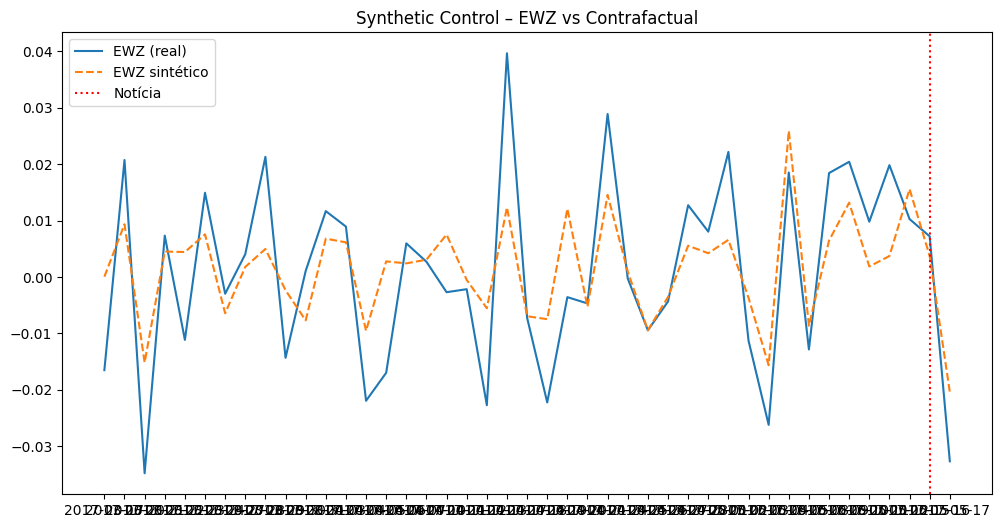

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_norm.index, Y1, label="EWZ (real)")
plt.plot(df_norm.index, EWZ_synth, label="EWZ sintético", linestyle="--")
plt.axvline(df_norm.index[t0], color="red", linestyle=":", label="Notícia")
plt.legend()
plt.title("Synthetic Control – EWZ vs Contrafactual")
plt.show()


In [ ]:
import statsmodels.api as sm

y = df_norm.loc[:t0, "EWZ"]
x = df_norm.loc[:t0, "EWZ_synth"]
x = sm.add_constant(x)

r2 = sm.OLS(y, x).fit().rsquared


KeyboardInterrupt: 

In [ ]:
r2